In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
print(os.listdir("../input/"))

['ckplus']


In [3]:
print(os.listdir("../input/ckplus/"))

['ck', 'CK+48']


In [4]:
print(os.listdir("../input/ckplus/CK+48"))

['surprise', 'fear', 'sadness', 'disgust', 'contempt', 'happy', 'anger']


In [5]:
dataset_path="/kaggle/input/ckplus/CK+48"

In [6]:
# Function to read images from a folder
def read_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

In [7]:
emotions=os.listdir("../input/ckplus/CK+48")
emotions

['surprise', 'fear', 'sadness', 'disgust', 'contempt', 'happy', 'anger']

In [8]:
# Initialize BRISK detector
brisk = cv2.BRISK_create()

In [9]:
# List of emotions to display
emotions_to_display = ['anger', 'surprise', 'disgust', 'happy']


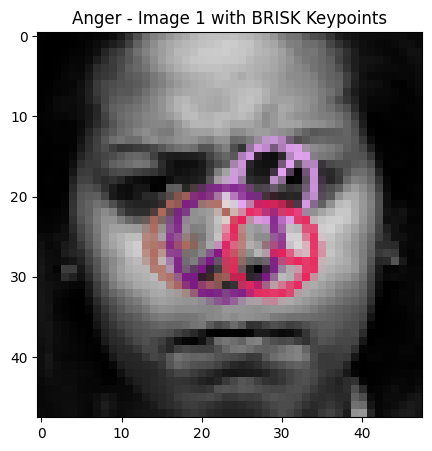

Number of Keypoints Detected In The Anger Image: 4


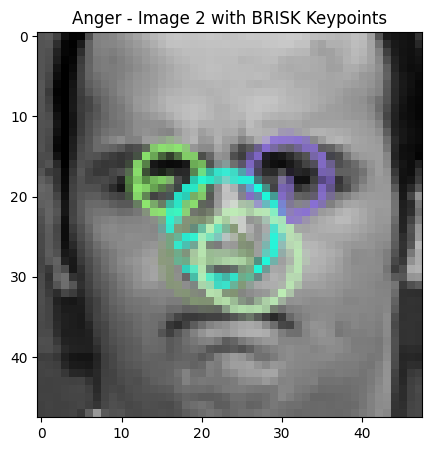

Number of Keypoints Detected In The Anger Query Image: 5


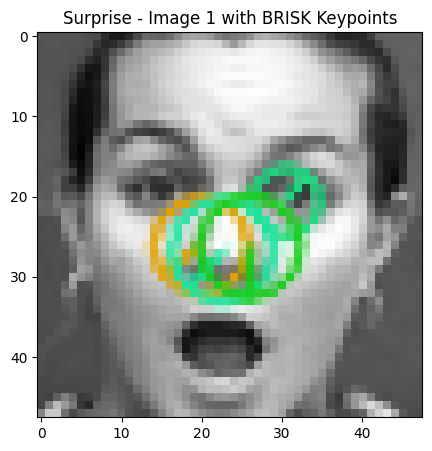

Number of Keypoints Detected In The Surprise Image: 4


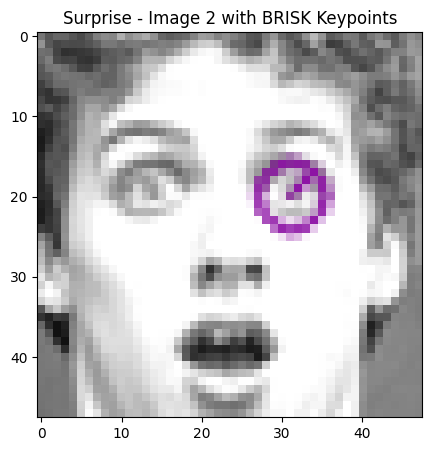

Number of Keypoints Detected In The Surprise Query Image: 1


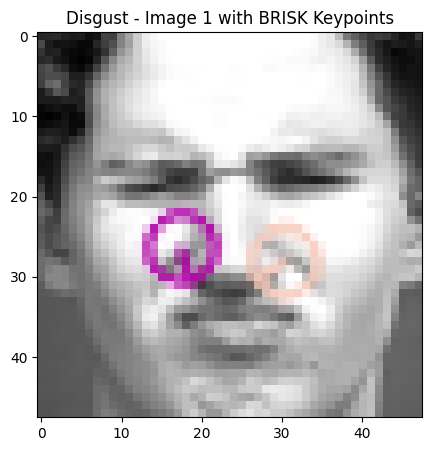

Number of Keypoints Detected In The Disgust Image: 2


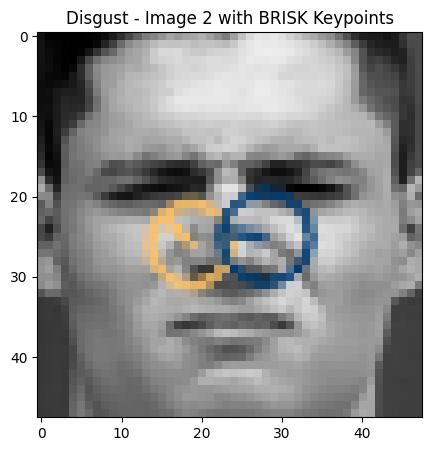

Number of Keypoints Detected In The Disgust Query Image: 2


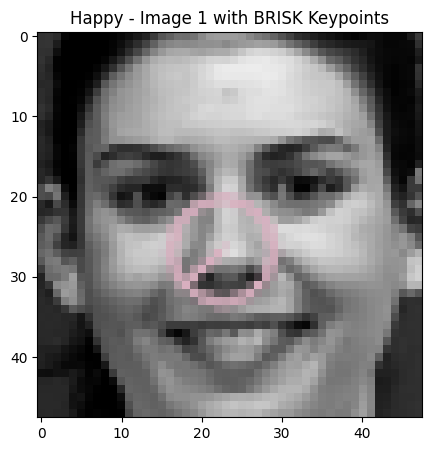

Number of Keypoints Detected In The Happy Image: 1


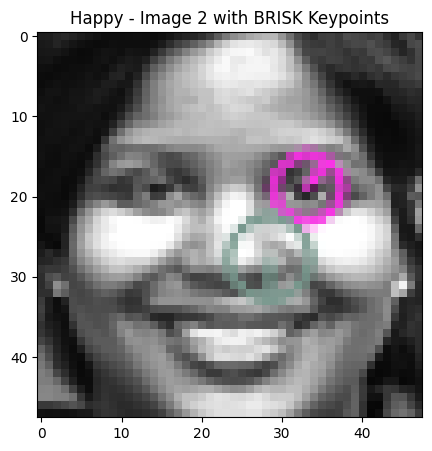

Number of Keypoints Detected In The Happy Query Image: 2


In [10]:
# Display images for specific emotions and print the number of keypoints
for emotion in emotions_to_display:
    # Create the path for the current emotion folder
    emotion_folder = os.path.join(dataset_path, emotion)

    # Read images from the folder
    emotion_images = read_images_from_folder(emotion_folder)

    # Display features for the first image in the emotion folder
    image = emotion_images[0]

    # Convert the image to gray scale
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Extract keypoints and descriptors using BRISK
    keypoints, descriptors = brisk.detectAndCompute(image_gray, None)

    # Display image with keypoints
    keypoints_image = np.copy(image)
    cv2.drawKeypoints(image, keypoints, keypoints_image, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Display the image with keypoints
    plt.figure(figsize=(10, 5))
    plt.title(f"{emotion.capitalize()} - Image 1 with BRISK Keypoints")
    plt.imshow(keypoints_image)
    plt.show()

    # Print the number of keypoints detected in the training image
    print(f"Number of Keypoints Detected In The {emotion.capitalize()} Image: {len(keypoints)}")

    # Match keypoints with the first image (assuming it as a reference)
    reference_descriptors = descriptors

    # Display features for the second image in the emotion folder
    image = emotion_images[1]

    # Convert the image to gray scale
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Extract keypoints and descriptors using BRISK
    keypoints, descriptors = brisk.detectAndCompute(image_gray, None)

    # Display image with keypoints
    keypoints_image = np.copy(image)
    cv2.drawKeypoints(image, keypoints, keypoints_image, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Display the image with keypoints
    plt.figure(figsize=(10, 5))
    plt.title(f"{emotion.capitalize()} - Image 2 with BRISK Keypoints")
    plt.imshow(keypoints_image)
    plt.show()

    # Print the number of keypoints detected in the query image
    print(f"Number of Keypoints Detected In The {emotion.capitalize()} Query Image: {len(keypoints)}")

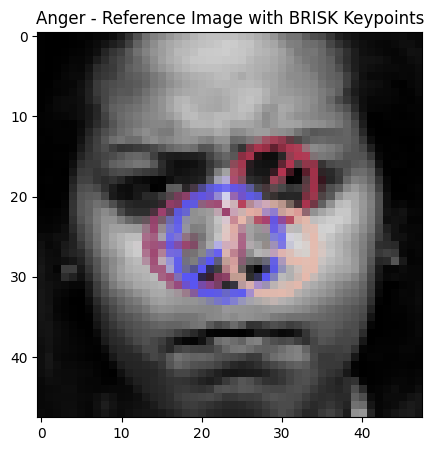

Number of Keypoints Detected In The Anger Reference Image: 4


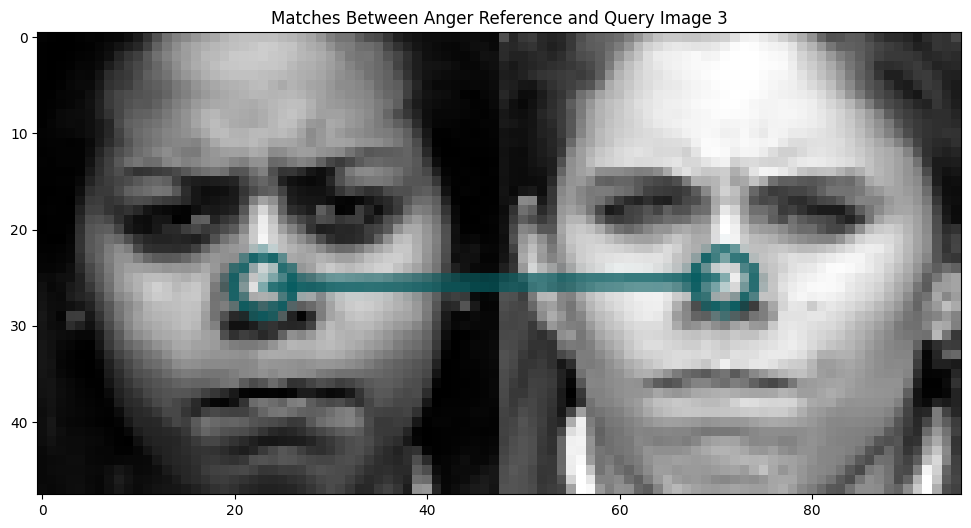

Number of Keypoints Detected In The Anger Query Image 3: 1


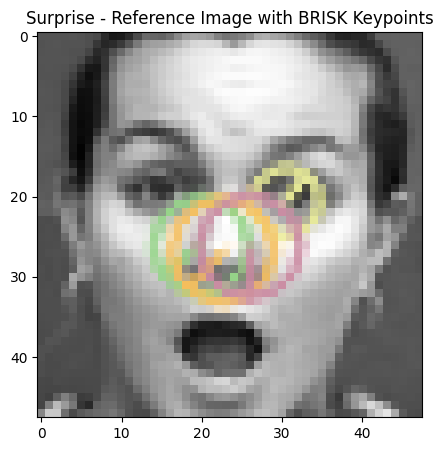

Number of Keypoints Detected In The Surprise Reference Image: 4


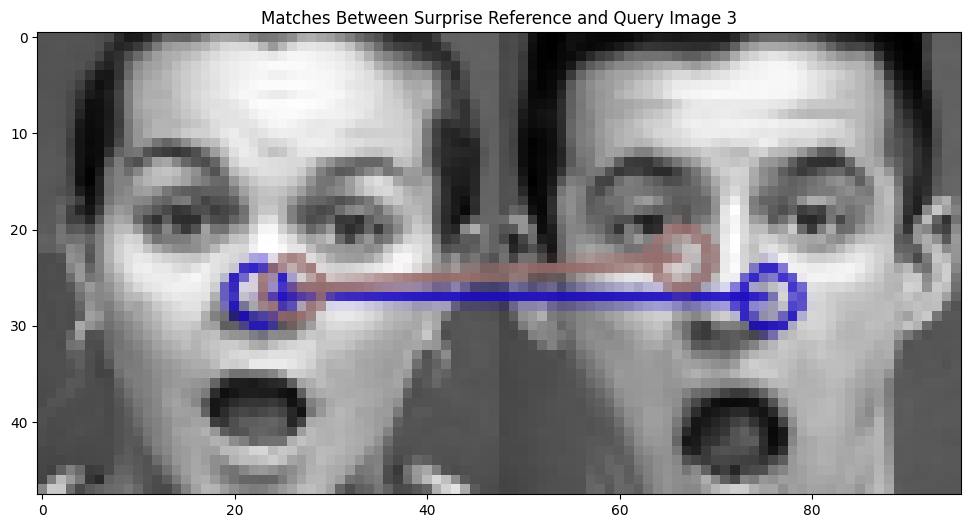

Number of Keypoints Detected In The Surprise Query Image 3: 2


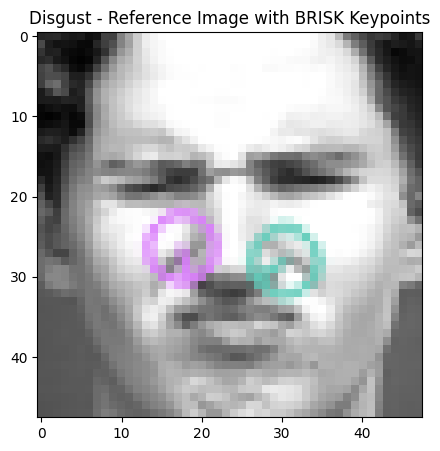

Number of Keypoints Detected In The Disgust Reference Image: 2


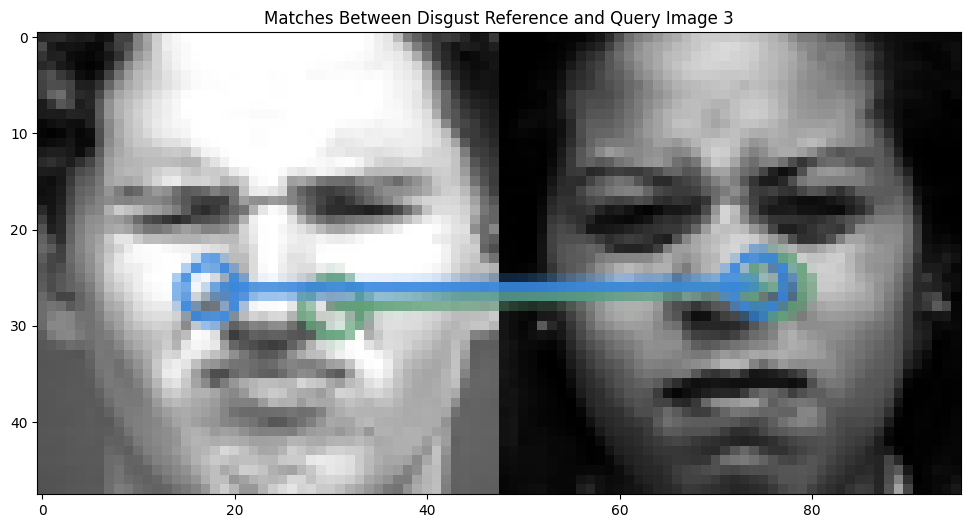

Number of Keypoints Detected In The Disgust Query Image 3: 3


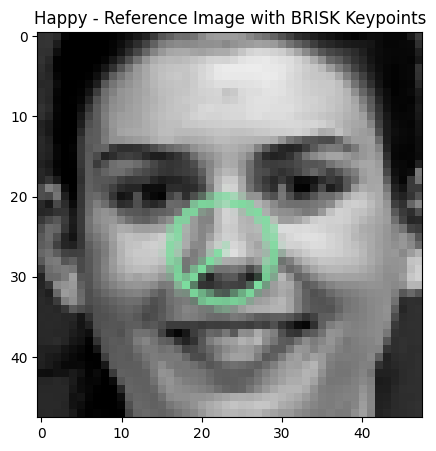

Number of Keypoints Detected In The Happy Reference Image: 1


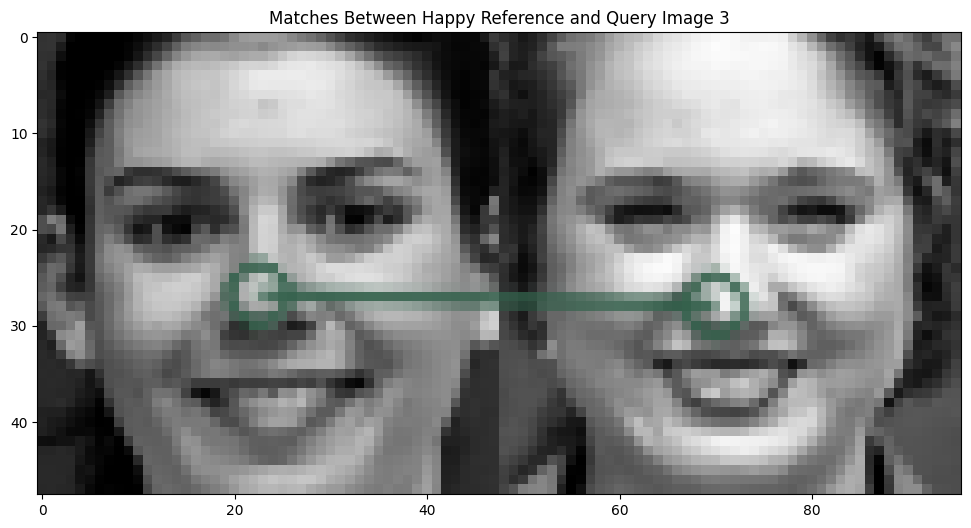

Number of Keypoints Detected In The Happy Query Image 3: 2


In [11]:
# Display images for specific emotions and print the number of keypoints
for emotion in emotions_to_display:
    # Create the path for the current emotion folder
    emotion_folder = os.path.join(dataset_path, emotion)

    # Read images from the folder
    emotion_images = read_images_from_folder(emotion_folder)

    # Display features for the first image in the emotion folder
    reference_image = emotion_images[0]

    # Convert the reference image to gray scale
    reference_gray = cv2.cvtColor(reference_image, cv2.COLOR_BGR2GRAY)

    # Extract keypoints and descriptors using BRISK
    reference_keypoints, reference_descriptors = brisk.detectAndCompute(reference_gray, None)

    # Display image with keypoints
    keypoints_image = np.copy(reference_image)
    cv2.drawKeypoints(reference_image, reference_keypoints, keypoints_image, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Display the reference image with keypoints
    plt.figure(figsize=(10, 5))
    plt.title(f"{emotion.capitalize()} - Reference Image with BRISK Keypoints")
    plt.imshow(keypoints_image)
    plt.show()
    

    # Print the number of keypoints detected in the training image
    print(f"Number of Keypoints Detected In The {emotion.capitalize()} Reference Image: {len(reference_keypoints)}")

    # Match keypoints with the reference image
    for i in range(2, min(3, len(emotion_images))):
        query_image = emotion_images[i]

        # Convert the query image to gray scale
        query_gray = cv2.cvtColor(query_image, cv2.COLOR_BGR2GRAY)

        # Extract keypoints and descriptors using BRISK
        query_keypoints, query_descriptors = brisk.detectAndCompute(query_gray, None)

        # Create a Brute Force Matcher object
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

        # Perform the matching between the reference image and the query image
        matches = bf.match(reference_descriptors, query_descriptors)

        # Sort the matches based on their distances
        matches = sorted(matches, key=lambda x: x.distance)

        # Draw matches on the images
        matched_image = cv2.drawMatches(reference_image, reference_keypoints, query_image, query_keypoints,
                                        matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

        # Display the matched keypoints
        plt.figure(figsize=(12, 6))
        plt.title(f"Matches Between {emotion.capitalize()} Reference and Query Image {i + 1}")
        plt.imshow(matched_image)
        plt.show()

        # Print the number of keypoints detected in the query image
        print(f"Number of Keypoints Detected In The {emotion.capitalize()} Query Image {i + 1}: {len(query_keypoints)}")

In [12]:
# Function to create a directory if it doesn't exist
def create_directory(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
# Output directory for matched images
output_directory = '/kaggle/working/output_brisk'
create_directory(output_directory)

In [13]:
# Variables to store counts
total_images_by_emotion = {}
skipped_images_by_emotion = {}

# Iterate through each emotion
for emotion in emotions:
    # Create the path for the current emotion folder in the dataset
    emotion_folder_dataset = os.path.join(dataset_path, emotion)

    # Read images from the folder
    emotion_images = read_images_from_folder(emotion_folder_dataset)

    # Output folder for matched images of each emotion
    output_emotion_folder = os.path.join(output_directory, emotion)
    create_directory(output_emotion_folder)

    # Initialize counts
    total_images_by_emotion[emotion] = len(emotion_images)
    skipped_images_by_emotion[emotion] = 0

    # Iterate through each pair of images for the current emotion
    for i in range(len(emotion_images)):
        # Display features for the first image in the emotion folder
        image1 = emotion_images[i]
        image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
        keypoints1, descriptors1 = brisk.detectAndCompute(image1_gray, None)

        # Iterate through subsequent images for the current emotion
        for j in range(i + 1, len(emotion_images)):
            # Display features for the second image in the emotion folder
            image2 = emotion_images[j]
            image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
            keypoints2, descriptors2 = brisk.detectAndCompute(image2_gray, None)

            # Check if descriptors are valid for matching
            if descriptors1 is None or descriptors2 is None or descriptors1.shape[1] != descriptors2.shape[1]:
                skipped_images_by_emotion[emotion] += 1
                continue

            # Check if the data type of descriptors is compatible for matching
            if descriptors1.dtype != descriptors2.dtype:
                skipped_images_by_emotion[emotion] += 1
                continue

            # Create a Brute Force Matcher object
            bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

            # Perform the matching between the descriptors of the two images
            matches = bf.match(descriptors1, descriptors2)

            # The matches with shorter distance are the ones we want
            matches = sorted(matches, key=lambda x: x.distance)

            # Draw matches on the images
            matched_image = np.copy(image2)
            matched_image = cv2.drawMatches(
                image1, keypoints1, image2, keypoints2, matches[:10], matched_image, flags=2
            )

            # Save matched image in the output directory for each emotion
            output_path = os.path.join(output_emotion_folder, f"{emotion}_{i + 1}_{j + 1}_matched_image.jpg")
            cv2.imwrite(output_path, matched_image)
    print("Processing completed. Output saved in:", output_directory)


# Print the results
print("\nSummary:")
for emotion in emotions:
    print(f"{emotion.capitalize()}:")
    print(f"  Total Images: {total_images_by_emotion[emotion]}")
    print(f"  Skipped Images: {skipped_images_by_emotion[emotion]}\n")
    

Processing completed. Output saved in: /kaggle/working/output_brisk
Processing completed. Output saved in: /kaggle/working/output_brisk
Processing completed. Output saved in: /kaggle/working/output_brisk
Processing completed. Output saved in: /kaggle/working/output_brisk
Processing completed. Output saved in: /kaggle/working/output_brisk
Processing completed. Output saved in: /kaggle/working/output_brisk
Processing completed. Output saved in: /kaggle/working/output_brisk

Summary:
Surprise:
  Total Images: 249
  Skipped Images: 9761

Fear:
  Total Images: 75
  Skipped Images: 1122

Sadness:
  Total Images: 84
  Skipped Images: 1470

Disgust:
  Total Images: 177
  Skipped Images: 3330

Contempt:
  Total Images: 54
  Skipped Images: 801

Happy:
  Total Images: 207
  Skipped Images: 13320

Anger:
  Total Images: 135
  Skipped Images: 4767



In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [15]:
# Function to read images and labels from a folder
def read_images_and_labels_from_folder(folder):
    images = []
    labels = []
    for emotion in os.listdir(folder):
        emotion_folder = os.path.join(folder, emotion)
        for filename in os.listdir(emotion_folder):
            img = cv2.imread(os.path.join(emotion_folder, filename))
            if img is not None:
                images.append(img)
                labels.append(emotion)
    return np.array(images), np.array(labels)

In [16]:
# Read images and labels
images, labels = read_images_and_labels_from_folder(dataset_path)


In [17]:
print("Number of images loaded:", len(images))
print("Unique labels:", np.unique(labels))

Number of images loaded: 981
Unique labels: ['anger' 'contempt' 'disgust' 'fear' 'happy' 'sadness' 'surprise']


In [18]:
# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

In [19]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)


In [20]:
# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0


In [21]:
# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))


In [22]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 4096)              0

In [23]:
# Train the model
hist=model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
25/25 [==============================] - 2s 45ms/step - loss: 1.7942 - accuracy: 0.2768 - val_loss: 1.8108 - val_accuracy: 0.4112
Epoch 2/10
25/25 [==============================] - 1s 36ms/step - loss: 1.4409 - accuracy: 0.5867 - val_loss: 1.1964 - val_accuracy: 0.6345
Epoch 3/10
25/25 [==============================] - 1s 36ms/step - loss: 0.8235 - accuracy: 0.7130 - val_loss: 0.8595 - val_accuracy: 0.6650
Epoch 4/10
25/25 [==============================] - 1s 36ms/step - loss: 0.5598 - accuracy: 0.7908 - val_loss: 0.6691 - val_accuracy: 0.7157
Epoch 5/10
25/25 [==============================] - 1s 37ms/step - loss: 0.4185 - accuracy: 0.8686 - val_loss: 0.4875 - val_accuracy: 0.7868
Epoch 6/10
25/25 [==============================] - 1s 39ms/step - loss: 0.3180 - accuracy: 0.8865 - val_loss: 0.3496 - val_accuracy: 0.8883
Epoch 7/10
25/25 [==============================] - 1s 36ms/step - loss: 0.2518 - accuracy: 0.9005 - val_loss: 0.3815 - val_accuracy: 0.8680
Epoch 8/10
25

In [24]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')
print(f'Test Loss: {test_loss}')

7/7 [==============================] - 0s 10ms/step - loss: 0.2455 - accuracy: 0.9289
Test accuracy: 0.9289340376853943
Test Loss: 0.2455013543367386


In [34]:
history=hist.history

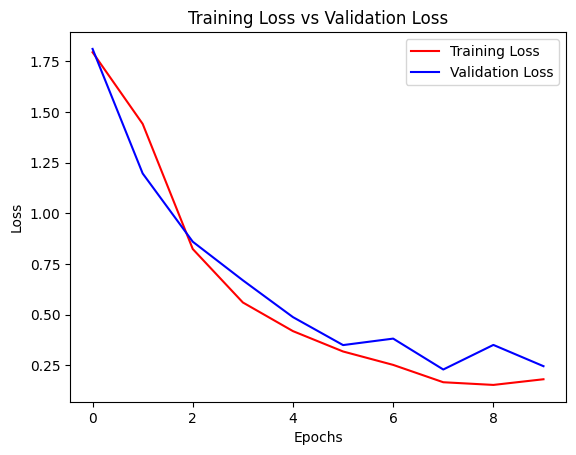

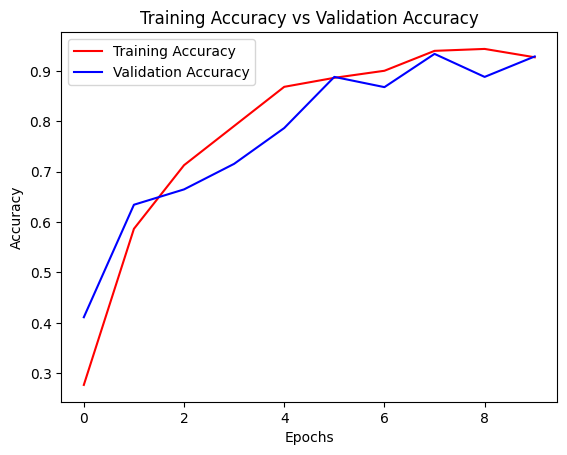

In [35]:
# Visualizing Training and Validation Loss
%matplotlib inline

train_loss = history['loss']
val_loss = history['val_loss']

epochs = range(len(train_loss))

plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualizing Training and Validation Accuracy
train_acc = history['accuracy']
val_acc = history['val_accuracy']

plt.plot(epochs, train_acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [26]:
# Predict the labels for the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

7/7 [==============================] - 0s 11ms/step


In [27]:
# Convert one-hot encoded labels back to original labels
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

In [28]:
# Generate confusion matrix and classification report
conf_mat = confusion_matrix(y_test_labels, y_pred_labels)
class_report = classification_report(y_test_labels, y_pred_labels, target_names=label_encoder.classes_)


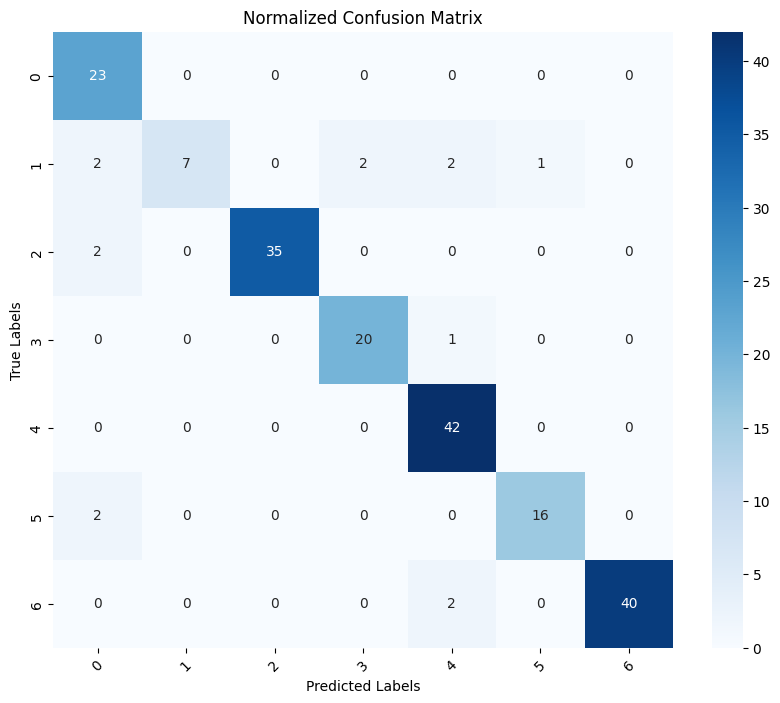

In [29]:

import seaborn as sns
# Plot the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
heatmap = sns.heatmap(conf_mat, annot=True, cmap="Blues")
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("Normalized Confusion Matrix")
plt.xticks(rotation=45)
plt.show()

In [30]:
# Display the classification report
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

       anger       0.79      1.00      0.88        23
    contempt       1.00      0.50      0.67        14
     disgust       1.00      0.95      0.97        37
        fear       0.91      0.95      0.93        21
       happy       0.89      1.00      0.94        42
     sadness       0.94      0.89      0.91        18
    surprise       1.00      0.95      0.98        42

    accuracy                           0.93       197
   macro avg       0.93      0.89      0.90       197
weighted avg       0.94      0.93      0.93       197

